# Installing Libaraies


In [56]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Ziv\OneDrive\מסמכים\שולחן העבודה\מערכות הפעלה\ZivUpdate2004 (1)\Ziv\data\project\win_venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [57]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Ziv\OneDrive\מסמכים\שולחן העבודה\מערכות הפעלה\ZivUpdate2004 (1)\Ziv\data\project\win_venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [58]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Ziv\OneDrive\מסמכים\שולחן העבודה\מערכות הפעלה\ZivUpdate2004 (1)\Ziv\data\project\win_venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [59]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Ziv\OneDrive\מסמכים\שולחן העבודה\מערכות הפעלה\ZivUpdate2004 (1)\Ziv\data\project\win_venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [60]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Ziv\OneDrive\מסמכים\שולחן העבודה\מערכות הפעלה\ZivUpdate2004 (1)\Ziv\data\project\win_venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [61]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Ziv\OneDrive\מסמכים\שולחן העבודה\מערכות הפעלה\ZivUpdate2004 (1)\Ziv\data\project\win_venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# sklearn imports
import sklearn
from sklearn import metrics
from sklearn import datasets
from sklearn import pipeline
from sklearn import preprocessing
from sklearn import model_selection
from xgboost import XGBRegressor

## Data Collecting


In [63]:
df=pd.read_csv("process_data.csv")


In [64]:
df

,cpu_utilization_avg,cpu_user_time_avg,cpu_system_time_avg,cpu_percent_avg,memory_rss,memory_vms,memory_shared,memory_data,io_read_count,io_write_count,...,note.gnu.build-id,plt,rela.dyn,rela.plt,rodata,shstrtab,strtab,symtab,text,input_size
0,99.952985,64.404776,3.052687,99.952985,1441792,2095714304,1310720,2093334528,8,0,...,0,4240,1488,1680,8192,13929,13929,12352,2727,3367
1,99.803191,89.662181,4.694255,99.803191,1835008,2875043840,1310720,2872664064,8,0,...,0,4240,1488,1680,8192,13929,13929,12352,2727,3367
2,99.591489,89.536277,4.703511,99.591489,655360,2674688,655360,229376,8,0,...,0,4240,1488,1680,8192,13929,13929,12352,2727,3367
3,99.991575,273.476832,0.017418,99.991575,1310720,4481024,1310720,2101248,8,0,...,0,4240,1488,1680,8192,13901,13901,12352,2215,2855
4,100.003922,77.009150,0.000000,100.003922,1310720,3674112,1310720,1294336,8,0,...,0,4240,1488,1680,8192,13901,13901,12352,2215,2855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5144,99.757764,78.024472,2.755217,99.757764,1441792,12419072,1441792,10039296,8,1,...,0,4448,1992,2208,8192,14612,14612,12352,4753,5505
5145,99.550318,75.841019,2.908280,99.550318,1572864,11329536,1441792,8949760,8,1,...,0,4448,1992,2208,8192,14612,14612,12352,4753,5505
5146,99.695395,73.240461,3.079145,99.695395,655360,2674688,655360,9420800,8,1,...,0,4448,1992,2208,8192,14612,14612,12352,4753,5505
5147,97.280272,70.056190,2.797075,97.280272,1441792,12214272,1441792,9834496,8,1,...,0,4448,1992,2208,8192,14612,14612,12352,4753,5505


## Remove Outliers

In [65]:
df = df[df['tat_time'] >=90]
df = df[df['tat_time'] <=300]
df=df[df['io_read_bytes']<=10]


In [66]:
df=df.drop(['tat_time'], axis=1)

In [67]:
df=df.drop(columns=['cpu_utilization_avg',	'cpu_user_time_avg' ,	'cpu_system_time_avg'	,'cpu_percent_avg'])

# Load Model for Predict TAT

In [68]:
import pickle

with open('modelForTAT.pkl', 'rb') as f:
    modelTAT = pickle.load(f)


In [69]:
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

# Processing To Predict TAT

In [70]:
df_model1=df[['memory_vms','memory_data','io_write_count',
              'bss','data','dynamic','dynstr','eh_frame','eh_frame_hdr',
              'fini','fini_array','gnu.version','gnu.version_r','got',
             'init','init_array','plt','rela.dyn','rela.plt',
             'shstrtab','strtab','text','input_size']].copy()

In [71]:
df_model1['vmsXmemorydata']=df_model1['memory_vms']*df_model1['memory_data']
df_model1['squaredmemorydata']=df_model1['memory_data']**2
df_model1['memorydata']=df_model1['memory_data']**4
df_model1['memory_vmslog']=np.sqrt(df_model1['memory_vms'])
df_model1['memory_datasin']=np.sin(df_model1['memory_data'])**2
df_model1["textXmemory_data"]=np.log(df_model1["memory_data"])**2

In [72]:
df_model1_scaled=scaler.fit_transform(df_model1)

In [73]:
tat_predict=modelTAT.predict(df_model1_scaled)

# Proccesing for Kmeans Model

In [74]:
df['tat_predicted']=tat_predict

In [75]:
df

,memory_rss,memory_vms,memory_shared,memory_data,io_read_count,io_write_count,io_read_bytes,io_write_bytes,open_files,connections,...,plt,rela.dyn,rela.plt,rodata,shstrtab,strtab,symtab,text,input_size,tat_predicted
0,1441792,2095714304,1310720,2093334528,8,0,0,0,0,0,...,4240,1488,1680,8192,13929,13929,12352,2727,3367,136.734680
1,1835008,2875043840,1310720,2872664064,8,0,0,0,0,0,...,4240,1488,1680,8192,13929,13929,12352,2727,3367,189.357117
2,655360,2674688,655360,229376,8,0,0,0,0,0,...,4240,1488,1680,8192,13929,13929,12352,2727,3367,183.689911
4,1310720,3674112,1310720,1294336,8,0,0,0,0,0,...,4240,1488,1680,8192,13901,13901,12352,2215,2855,152.664993
7,1441792,3506176,1310720,1126400,8,0,0,0,0,0,...,4240,1488,1680,8192,13901,13901,12352,2215,2855,105.863060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5143,1441792,13963264,1441792,11583488,8,1,0,0,0,0,...,4448,1992,2208,8192,14612,14612,12352,4753,5505,188.379181
5144,1441792,12419072,1441792,10039296,8,1,0,0,0,0,...,4448,1992,2208,8192,14612,14612,12352,4753,5505,157.930557
5145,1572864,11329536,1441792,8949760,8,1,0,0,0,0,...,4448,1992,2208,8192,14612,14612,12352,4753,5505,145.905365
5146,655360,2674688,655360,9420800,8,1,0,0,0,0,...,4448,1992,2208,8192,14612,14612,12352,4753,5505,157.722763


In [76]:
df

,memory_rss,memory_vms,memory_shared,memory_data,io_read_count,io_write_count,io_read_bytes,io_write_bytes,open_files,connections,...,plt,rela.dyn,rela.plt,rodata,shstrtab,strtab,symtab,text,input_size,tat_predicted
0,1441792,2095714304,1310720,2093334528,8,0,0,0,0,0,...,4240,1488,1680,8192,13929,13929,12352,2727,3367,136.734680
1,1835008,2875043840,1310720,2872664064,8,0,0,0,0,0,...,4240,1488,1680,8192,13929,13929,12352,2727,3367,189.357117
2,655360,2674688,655360,229376,8,0,0,0,0,0,...,4240,1488,1680,8192,13929,13929,12352,2727,3367,183.689911
4,1310720,3674112,1310720,1294336,8,0,0,0,0,0,...,4240,1488,1680,8192,13901,13901,12352,2215,2855,152.664993
7,1441792,3506176,1310720,1126400,8,0,0,0,0,0,...,4240,1488,1680,8192,13901,13901,12352,2215,2855,105.863060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5143,1441792,13963264,1441792,11583488,8,1,0,0,0,0,...,4448,1992,2208,8192,14612,14612,12352,4753,5505,188.379181
5144,1441792,12419072,1441792,10039296,8,1,0,0,0,0,...,4448,1992,2208,8192,14612,14612,12352,4753,5505,157.930557
5145,1572864,11329536,1441792,8949760,8,1,0,0,0,0,...,4448,1992,2208,8192,14612,14612,12352,4753,5505,145.905365
5146,655360,2674688,655360,9420800,8,1,0,0,0,0,...,4448,1992,2208,8192,14612,14612,12352,4753,5505,157.722763


## Encoding

In [77]:
# dummy encode the categorical variables in the df with method like status
lb = sklearn.preprocessing.LabelEncoder()
df["status"]=lb.fit_transform(df["status"])

## Feature Engineering

In [78]:
columns_to_keep = (df.nunique() > 1) | (df.columns == "io_write_bytes")
df = df.loc[:, columns_to_keep]


In [79]:
memory_data=df['memory_data']

In [80]:
df=df.drop(columns=['create_time','memory_rss','memory_vms' ,'open_files','memory_shared','memory_data'])

I want to distinguish the group of input-output processes from the other groups.

In [81]:
df['io_write_count']=(df['io_write_count'])*250


In [82]:
df_scaled=df

## Finding the Best K

In [83]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

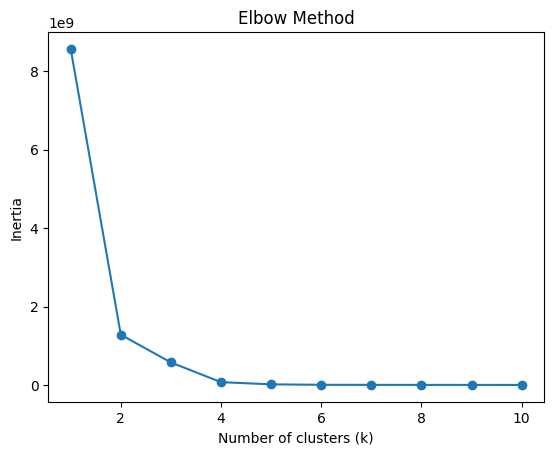

In [84]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

Best k: 5, Silhouette Score: 0.908


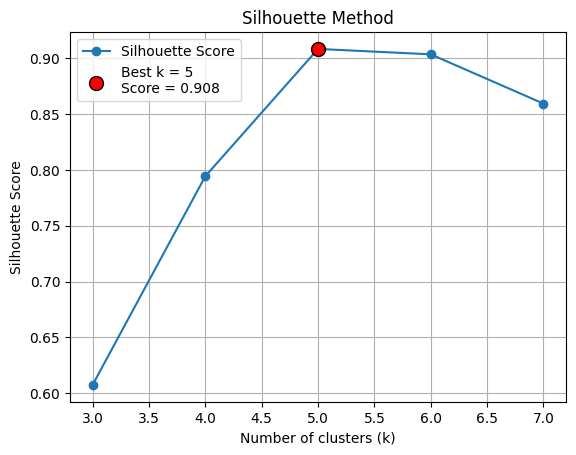

In [85]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = []
k_values = range(3, 8)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    silhouette_scores.append(score)

best_k_index = silhouette_scores.index(max(silhouette_scores))
best_k = k_values[best_k_index]
best_score = silhouette_scores[best_k_index]

plt.plot(k_values, silhouette_scores, marker='o', label='Silhouette Score')
plt.scatter(best_k, best_score, color='red', s=100, edgecolors='black', zorder=5, label=f'Best k = {best_k}\nScore = {best_score:.3f}')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.legend()
plt.grid(True)

print(f'Best k: {best_k}, Silhouette Score: {best_score:.3f}')


# Using PCA for Visualizing the Clustering

C:\Users\Ziv\OneDrive\מסמכים\שולחן העבודה\מערכות הפעלה\ZivUpdate2004 (1)\Ziv\data\project\win_venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


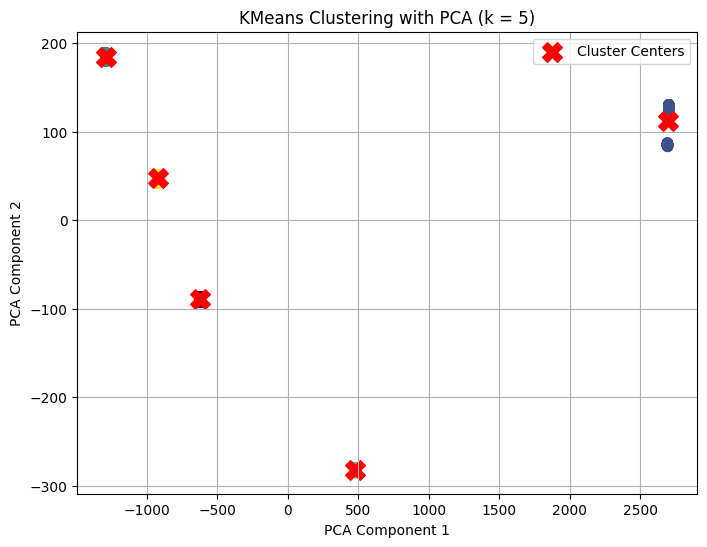

In [86]:
from sklearn.decomposition import PCA
# Step 1: Fit KMeans with the best k
best_kmeans = KMeans(n_clusters=5, random_state=0)
labels = best_kmeans.fit_predict(df_scaled)

# Step 2: Reduce dimensions with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)
centers_pca = pca.transform(best_kmeans.cluster_centers_)

# Step 3: Plot PCA-reduced data colored by cluster
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], 
            c='red', s=200, marker='X', label='Cluster Centers')
plt.title(f'KMeans Clustering with PCA (k = {best_k})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\Ziv\OneDrive\מסמכים\שולחן העבודה\מערכות הפעלה\ZivUpdate2004 (1)\Ziv\data\project\win_venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


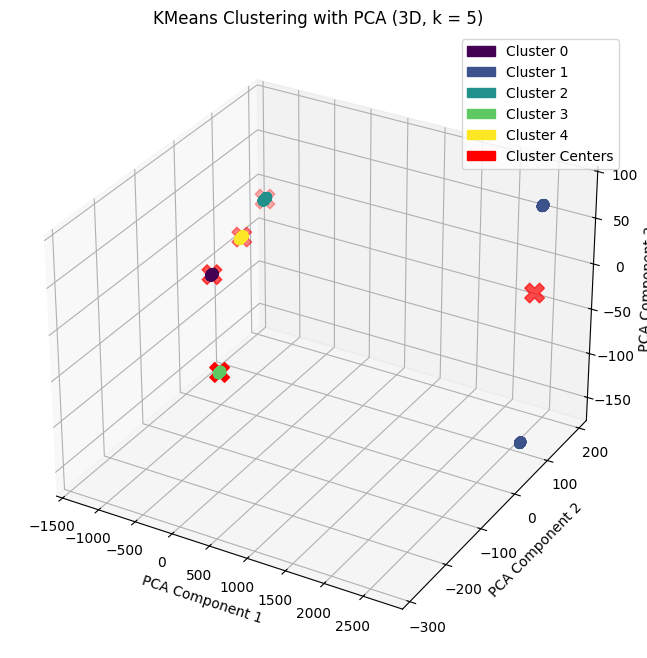

In [87]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches  # For custom legend handles
import numpy as np

# Step 1: Fit KMeans with the best k
best_kmeans = KMeans(n_clusters=best_k, random_state=0)
labels = best_kmeans.fit_predict(df_scaled)

# Step 2: Reduce dimensions with PCA to 3D
pca = PCA(n_components=3)
X_pca = pca.fit_transform(df_scaled)
centers_pca = pca.transform(best_kmeans.cluster_centers_)

# Step 3: Plot 3D PCA-reduced data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create scatter plot with cluster labels
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
                     c=labels, cmap='viridis', s=50, alpha=0.7)

# Add cluster centers
ax.scatter(centers_pca[:, 0], centers_pca[:, 1], centers_pca[:, 2],
           c='red', s=200, marker='X', label='Cluster Centers')

# Create custom legend for cluster labels
unique_labels = np.unique(labels)
colors = scatter.cmap(scatter.norm(unique_labels))  # Get actual colors used
legend_patches = [mpatches.Patch(color=colors[i], label=f'Cluster {label}') 
                  for i, label in enumerate(unique_labels)]

# Add legend
ax.legend(handles=legend_patches + [mpatches.Patch(color='red', label='Cluster Centers')])

# Labels and title
ax.set_title(f'KMeans Clustering with PCA (3D, k = {best_k})')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

plt.show()


In [88]:
df['labels']=labels


In [89]:
df

,io_read_count,io_write_count,io_write_bytes,bss,data,dynamic,dynstr,eh_frame,eh_frame_hdr,fini,...,init_array,plt,rela.dyn,rela.plt,shstrtab,strtab,text,input_size,tat_predicted,labels
0,8,0,0,8,632,11688,1248,8296,8224,11680,...,11672,4240,1488,1680,13929,13929,2727,3367,136.734680,0
1,8,0,0,8,632,11688,1248,8296,8224,11680,...,11672,4240,1488,1680,13929,13929,2727,3367,189.357117,0
2,8,0,0,8,632,11688,1248,8296,8224,11680,...,11672,4240,1488,1680,13929,13929,2727,3367,183.689911,0
4,8,0,0,8,632,11688,1248,8288,8224,11680,...,11672,4240,1488,1680,13901,13901,2215,2855,152.664993,2
7,8,0,0,8,632,11688,1248,8288,8224,11680,...,11672,4240,1488,1680,13901,13901,2215,2855,105.863060,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5143,8,250,0,16,736,11584,1584,8640,8552,11576,...,11568,4448,1992,2208,14612,14612,4753,5505,188.379181,1
5144,8,250,0,16,736,11584,1584,8640,8552,11576,...,11568,4448,1992,2208,14612,14612,4753,5505,157.930557,1
5145,8,250,0,16,736,11584,1584,8640,8552,11576,...,11568,4448,1992,2208,14612,14612,4753,5505,145.905365,1
5146,8,250,0,16,736,11584,1584,8640,8552,11576,...,11568,4448,1992,2208,14612,14612,4753,5505,157.722763,1


In [90]:
df['memory_data']=memory_data

In [91]:
df

,io_read_count,io_write_count,io_write_bytes,bss,data,dynamic,dynstr,eh_frame,eh_frame_hdr,fini,...,plt,rela.dyn,rela.plt,shstrtab,strtab,text,input_size,tat_predicted,labels,memory_data
0,8,0,0,8,632,11688,1248,8296,8224,11680,...,4240,1488,1680,13929,13929,2727,3367,136.734680,0,2093334528
1,8,0,0,8,632,11688,1248,8296,8224,11680,...,4240,1488,1680,13929,13929,2727,3367,189.357117,0,2872664064
2,8,0,0,8,632,11688,1248,8296,8224,11680,...,4240,1488,1680,13929,13929,2727,3367,183.689911,0,229376
4,8,0,0,8,632,11688,1248,8288,8224,11680,...,4240,1488,1680,13901,13901,2215,2855,152.664993,2,1294336
7,8,0,0,8,632,11688,1248,8288,8224,11680,...,4240,1488,1680,13901,13901,2215,2855,105.863060,2,1126400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5143,8,250,0,16,736,11584,1584,8640,8552,11576,...,4448,1992,2208,14612,14612,4753,5505,188.379181,1,11583488
5144,8,250,0,16,736,11584,1584,8640,8552,11576,...,4448,1992,2208,14612,14612,4753,5505,157.930557,1,10039296
5145,8,250,0,16,736,11584,1584,8640,8552,11576,...,4448,1992,2208,14612,14612,4753,5505,145.905365,1,8949760
5146,8,250,0,16,736,11584,1584,8640,8552,11576,...,4448,1992,2208,14612,14612,4753,5505,157.722763,1,9420800


In [92]:
df['memory_dataXtat']=df['memory_data']*df['tat_predicted']

In [93]:
df

,io_read_count,io_write_count,io_write_bytes,bss,data,dynamic,dynstr,eh_frame,eh_frame_hdr,fini,...,rela.dyn,rela.plt,shstrtab,strtab,text,input_size,tat_predicted,labels,memory_data,memory_dataXtat
0,8,0,0,8,632,11688,1248,8296,8224,11680,...,1488,1680,13929,13929,2727,3367,136.734680,0,2093334528,2.862314e+11
1,8,0,0,8,632,11688,1248,8296,8224,11680,...,1488,1680,13929,13929,2727,3367,189.357117,0,2872664064,5.439594e+11
2,8,0,0,8,632,11688,1248,8296,8224,11680,...,1488,1680,13929,13929,2727,3367,183.689911,0,229376,4.213406e+07
4,8,0,0,8,632,11688,1248,8288,8224,11680,...,1488,1680,13901,13901,2215,2855,152.664993,2,1294336,1.975998e+08
7,8,0,0,8,632,11688,1248,8288,8224,11680,...,1488,1680,13901,13901,2215,2855,105.863060,2,1126400,1.192442e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5143,8,250,0,16,736,11584,1584,8640,8552,11576,...,1992,2208,14612,14612,4753,5505,188.379181,1,11583488,2.182088e+09
5144,8,250,0,16,736,11584,1584,8640,8552,11576,...,1992,2208,14612,14612,4753,5505,157.930557,1,10039296,1.585512e+09
5145,8,250,0,16,736,11584,1584,8640,8552,11576,...,1992,2208,14612,14612,4753,5505,145.905365,1,8949760,1.305818e+09
5146,8,250,0,16,736,11584,1584,8640,8552,11576,...,1992,2208,14612,14612,4753,5505,157.722763,1,9420800,1.485875e+09


In [94]:
# Group by 'group' and sort within each group by 'value'
sorted_df = df.sort_values(['labels', 'tat_predicted'])

In [95]:
sorted_df

,io_read_count,io_write_count,io_write_bytes,bss,data,dynamic,dynstr,eh_frame,eh_frame_hdr,fini,...,rela.dyn,rela.plt,shstrtab,strtab,text,input_size,tat_predicted,labels,memory_data,memory_dataXtat
505,8,0,0,8,632,11688,1248,8296,8224,11680,...,1488,1680,13929,13929,2727,3367,104.371582,0,1455415296,1.519040e+11
334,8,0,0,8,632,11688,1248,8296,8224,11680,...,1488,1680,13929,13929,2727,3367,109.948265,0,1584025600,1.741609e+11
160,8,0,0,8,632,11688,1248,8296,8224,11680,...,1488,1680,13929,13929,2727,3367,110.134377,0,1695522816,1.867353e+11
502,8,0,0,8,632,11688,1248,8296,8224,11680,...,1488,1680,13929,13929,2727,3367,110.140259,0,1502212096,1.654540e+11
344,8,0,0,8,632,11688,1248,8296,8224,11680,...,1488,1680,13929,13929,2727,3367,110.879044,0,1482919936,1.644247e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3837,8,0,0,8,632,11688,1248,8296,8224,11680,...,1488,1680,13929,13929,2494,3134,297.815948,4,3120648192,9.293788e+11
4560,8,0,0,8,632,11688,1248,8296,8224,11680,...,1488,1680,13929,13929,2494,3134,297.843384,4,3123916800,9.304380e+11
398,8,0,0,8,632,11688,1248,8296,8224,11680,...,1488,1680,13929,13929,2494,3134,298.149017,4,3164319744,9.434388e+11
3776,8,0,0,8,632,11688,1248,8296,8224,11680,...,1488,1680,13929,13929,2494,3134,299.171783,4,3117846528,9.327717e+11


In [96]:
import pandas as pd

df.to_csv('cluster.csv', index=False)


# Save the Model

In [97]:

with open('modelForPriorty.pkl', 'wb') as f:
     pickle.dump(best_kmeans, f)
